243 31
所有度数是 [14, 11, 24, 30, 30, 17, 17, 16, 18, 23, 20, 10, 18, 14, 11, 23, 16, 7, 16, 20, 16, 10, 11, 11, 10, 10, 11, 11, 11, 15, 15]
度数前五用户名字： tyn1998
度数前五用户名字： frank-zsy
度数前五用户名字： pomelo-nwu
度数前五用户名字： andyhuang18
度数前五用户名字： wj23027


影响力前五用户： Yanyan-Wang
影响力前五用户： Aarebecca
影响力前五用户： pomelo-nwu
影响力前五用户： tyn1998
影响力前五用户： frank-zsy


综合考虑最有影响力的人： Yanyan-Wang
最有可能成为朋友的人(相同朋友最多): pomelo-nwu


与yanyanWang连接强度最高的五个: Aarebecca
与yanyanWang连接强度最高的五个: pomelo-nwu
与yanyanWang连接强度最高的五个: yangzy0603
与yanyanWang连接强度最高的五个: tyn1998
与yanyanWang连接强度最高的五个: yvonneyx




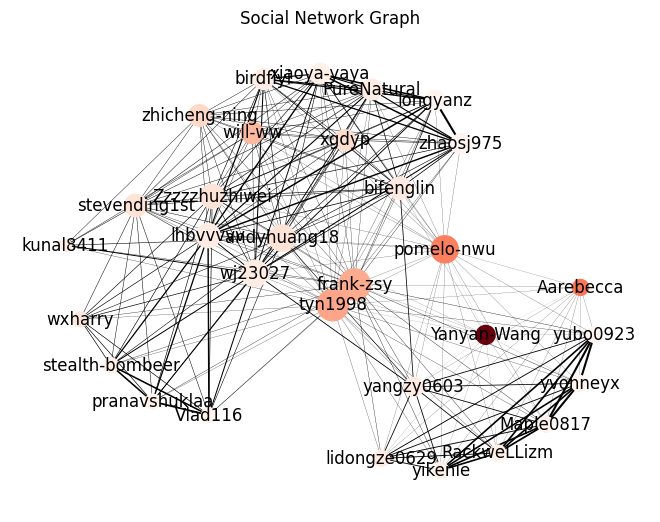

In [ ]:
import json
with open('hw4_data.json','r') as file:
    data = json.load(file)
    node = data.get('nodes')
    edge = data.get('edges')
row = len(node)
col = row
socialNet = [[0 for _ in range(col)] for _ in range(row)]
print(len(edge),len(node))
#1

#a.构建社交网络
def findNode_count(edge,node):
    res = [0,0]
    n1 = edge[0]
    n2 = edge[1]
    for i in range(0,len(node)):
        if n1 == node[i][0]:
            res[0] = i
        if n2 == node[i][0]:
            res[1] = i
    return res

for i in edge:
    res = findNode_count(i,node)
    socialNet[res[0]][res[1]] = i[2]
    socialNet[res[1]][res[0]] = i[2]

#b.寻找每个用户直接朋友
friends = [[]for _ in range(row)]
for i in range(row):
    for j in range(row):
        if socialNet[i][j] != 0:
            friends[i].append(node[j][0])
for i in range(row):
    print(node[i][0],"该用户直接朋友：",friends[i])
    

#2

#a.计算度数，求出前五度数的用户
degrees=[len(friends[i]) for i in range(row)]#索引对应node里面用户顺序
print("所有度数是",degrees)
import heapq
degree_largest_five = heapq.nlargest(5,enumerate(degrees),key=lambda x:x[1])

for i in degree_largest_five:
    print("度数前五用户名字：",node[i[0]][0])

print('\n')
#b.影响力前五的用户
impact_five = heapq.nlargest(5,enumerate(node),key=lambda x : x[1][1])
for i in impact_five:
    print("影响力前五用户：",node[i[0]][0])
print('\n')

#c.综合考虑,影响力和朋友数量五五开
comprehension = [(degrees[i] * 0.5 + node[i][1] * 0.5) for i in range(row)]
most_powerful_index = heapq.nlargest(1,enumerate(comprehension),key=lambda x:x[1])
most_powerful_man = node[most_powerful_index[0][0]][0]
print("综合考虑最有影响力的人：",most_powerful_man) 


#3推荐新朋友

#a.yanyanWang 朋友的朋友最可能成为新朋友的是
friendsOfWang = friends[0]
CountSameFriends = [0 for _  in range(row)]
for i in range(1,row):
    count = 0
    for j in friends[i]:
        if j in friendsOfWang:
            count += 1
    CountSameFriends[i] = count
most_probable = heapq.nlargest(1,enumerate(CountSameFriends),key=lambda x:x[1])
print("最有可能成为朋友的人(相同朋友最多):",node[most_probable[0][0]][0])

print('\n')

#b.与yanyanWang连接强度最高的五个
link_largest_five = heapq.nlargest(5,enumerate(socialNet[0]),key=lambda x:x[1])
for i in link_largest_five:
    print("与yanyanWang连接强度最高的五个:",node[i[0]][0])
print('\n')

#4 可视化

import networkx as nx
import matplotlib.pyplot as plt

#创建图并添加节点和边
G = nx.Graph()
for i in node:
    G.add_node(i[0])
for i in edge:
    G.add_edge(i[0],i[1])

#设置节点颜色和大小
import math
node_colors = [node[i][1]*1000 for i in range(row)]#影响力
node_sizes = [degrees[i]* 5 * math.log(degrees[i]) for i in range(row)]#度数
edge_width = [1 for _ in range(len(edge))]
for i in range(243):
    edge_width[i] /= edge[i][2]
    
#绘制图形
pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos,with_labels = True,node_color = node_colors,node_size = node_sizes,cmap = plt.cm.Reds,width = edge_width)
plt.title("Social Network Graph")
plt.show()

